In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.append("../../ex02/template") # This goes up twice in the directories tree (hence in labs)
                                       # then goes down to ex02/template where your files from lab 2 are.
sys.path.append("../../ex03/template") # This goes up twice in the directories tree (hence in labs)
                                       # then goes down to ex02/template where your files from lab 2 are.

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [9]:
from helpers import load_data

# load dataset
x, y = load_data()

In [10]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [11]:
from costs import compute_mse_loss
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    
    te_idx = k_indices[k]
    tr_idx = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_idx = tr_idx.reshape(-1)
    
    y_te = y[te_idx]
    x_te = x[te_idx]
    
    y_tr = y[tr_idx]
    x_tr = x[tr_idx]
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_te_poly = build_poly(x_te, degree)
    x_tr_poly = build_poly(x_tr, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    loss_tr, w = ridge_regression(y_tr, x_tr_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_te = compute_mse_loss(y_te, x_te_poly, w)
    
    return np.sqrt(2*loss_tr), np.sqrt(2*loss_te)

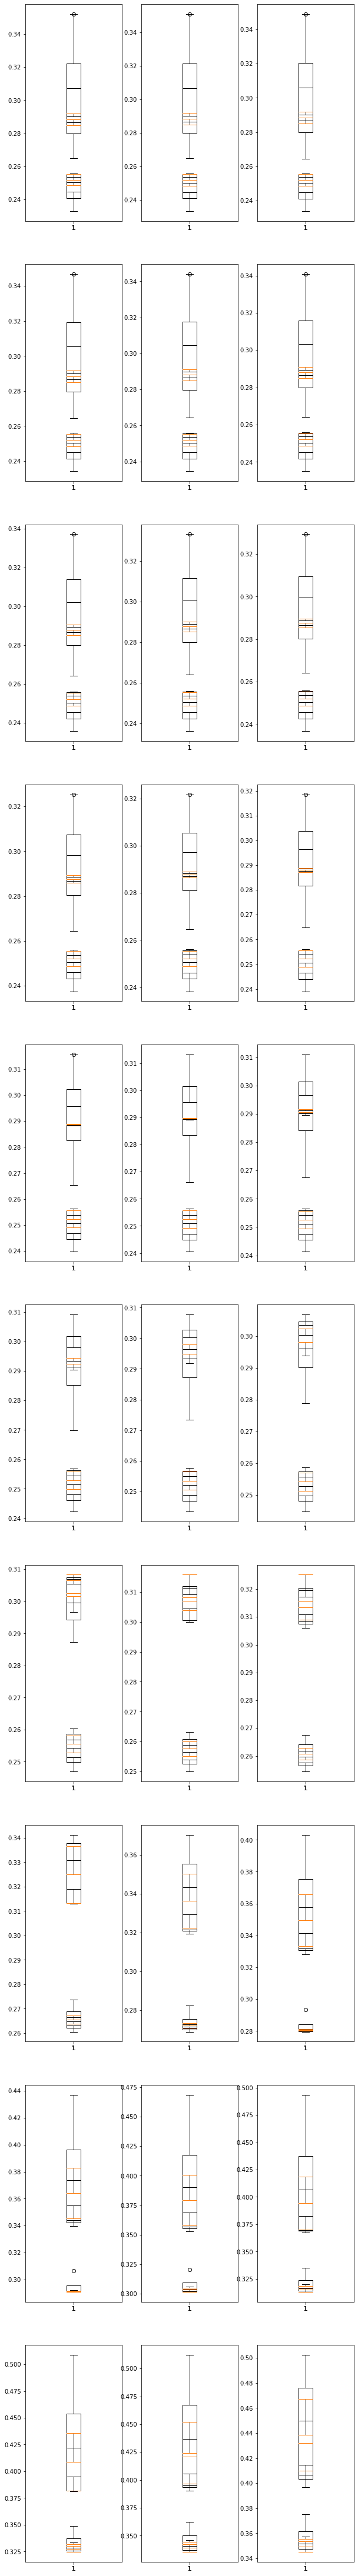

In [29]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    
    plt.figure(figsize=(10, 80))
    for i, lambda_ in enumerate(lambdas):
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
            
            plt.subplot(10, 3, i+1)
            plt.boxplot(rmse_te_tmp)
            plt.boxplot(rmse_tr_tmp)
            
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
    plt.show()
    #cross_validation_visualization(lambdas, rmse_tr, rmse_te)
cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

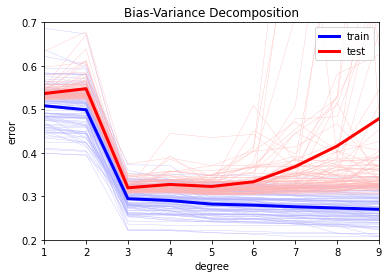

In [59]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio_train, seed)
        for idx_deg, degree in enumerate(degrees):
            x_tr_poly = build_poly(x_tr, degree)
            x_te_poly = build_poly(x_te, degree)
            
            _, w = least_squares(y_tr, x_tr_poly)
            
            rmse_tr[index_seed, idx_deg] = np.sqrt(2*compute_mse_loss(y_tr, x_tr_poly, w))
            rmse_te[index_seed, idx_deg] = np.sqrt(2*compute_mse_loss(y_te, x_te_poly, w))
            
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        
        

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()